<a href="https://colab.research.google.com/github/19PA1A0495/cv-ip-31-/blob/main/cv_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [2]:
train_dir = "/content/drive/MyDrive/CVDataset/casting_data/casting_data/train"
test_dir = "/content/drive/MyDrive/CVDataset/casting_data/casting_data/test"

In [3]:
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.1077)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(300,300),batch_size=32,class_mode = "binary",shuffle=True, subset = 'training')
valid_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(300,300),batch_size=32,class_mode = "binary",shuffle=True, subset = 'validation')
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(300,300),batch_size=32,class_mode = "binary",shuffle=False)

Found 5932 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(300,300,3)))
model.add(MaxPool2D(pool_size=(5,5),strides = 3))

model.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(5,5),strides = 3))

model.add(Conv2D(filters = 128, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(5,5),strides = 3))

model.add(Flatten())
model.add(Dense(512,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [10]:
model.compile(loss='hinge', optimizer='adagrad', metrics=['accuracy'])

In [11]:
history = model.fit_generator(training_set,steps_per_epoch=50,epochs=10,validation_data=valid_set, validation_steps=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 185s 4s/step - loss: 0.9262 - accuracy: 0.5481 - val_loss: 0.8789 - val_accuracy: 0.5678
Epoch 2/10
50/50 [==============================] - 160s 3s/step - loss: 0.9233 - accuracy: 0.5450 - val_loss: 0.8762 - val_accuracy: 0.5678
Epoch 3/10
50/50 [==============================] - 136s 3s/step - loss: 0.9045 - accuracy: 0.5531 - val_loss: 0.8850 - val_accuracy: 0.5678
Epoch 4/10
50/50 [==============================] - 126s 3s/step - loss: 0.9031 - accuracy: 0.5544 - val_loss: 0.8842 - val_accuracy: 0.5678
Epoch 5/10
50/50 [==============================] - 112s 2s/step - loss: 0.8620 - accuracy: 0.5744 - val_loss: 0.8750 - val_accuracy: 0.5678
Epoch 6/10
50/50 [==============================] - 105s 2s/step - loss: 0.8690 - accuracy: 0.5706 - val_loss: 0.8743 - val_accuracy: 0.5678
Epoch 7/10
50/50 [==============================] - 103s 2s/step - loss: 0.8413 - accuracy: 0.5844 - val_loss: 0.8752 - val_accuracy: 0.5678
Epoch 8/10
50

In [14]:
batch_size=10
test_score = model.evaluate_generator(valid_set, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 61.87%
[INFO] Loss:  0.774530291557312


Text(0.5, 1.0, 'Accuracy Curves')

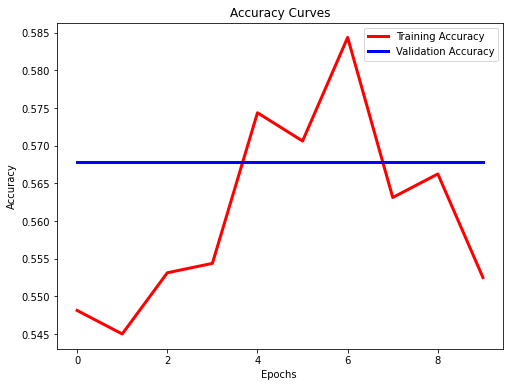

In [16]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

Text(0.5, 1.0, 'loss Curves')

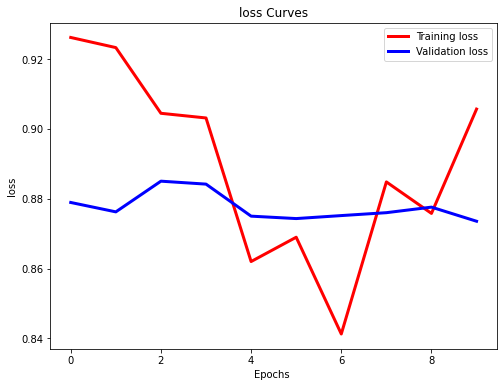

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epochs ')
plt.ylabel('loss')
plt.title('loss Curves')